# Import Required Libraries
Import necessary libraries such as pandas, os, dotenv, and google.genai.

In [45]:
# Import Required Libraries
import pandas as pd
from google import genai
from google.genai import types
from google.api_core import retry
import os
from dotenv import load_dotenv

# Load Environment Variables
Use the dotenv library to load environment variables from the 'config.env' file.

In [46]:
# Load environment variables from the .config file
load_dotenv("config.env")

# Retrieve the API key
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
client = genai.Client(api_key=GOOGLE_API_KEY)

# Set Up Retry Mechanism for API Calls
Define a retry mechanism for API calls using google.api_core.retry.

In [47]:
# Define a retry mechanism for API calls
is_retriable = lambda e: (isinstance(e, genai.errors.APIError) and e.code in {429, 503})
genai.models.Models.generate_content = retry.Retry(predicate=is_retriable)(genai.models.Models.generate_content)

# Read and Process CSV Data
Read data from a CSV file into a Pandas DataFrame and process it for analysis.

In [48]:
import yfinance as yf
import datetime as dt
# Fetch stock data for the last 13 months using yfinance
def fetch_stock_data(ticker):
    end_date = dt.datetime.now()
    start_date = end_date - dt.timedelta(days=395)  # 13 months
    data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
    return data

def technical_analysis_and_prediction(tickers):
    if not tickers:
        st.write("No tickers found for technical analysis.")
        return []

    results = []

    for ticker in tickers:
        try:
            data = yf.download(ticker, period='3mo', interval='1d')
            if data.empty:
                continue

            # Calculate moving averages
            data['SMA_20'] = data['Close'].rolling(window=20).mean()
            data['SMA_50'] = data['Close'].rolling(window=50).mean()

            # Calculate RSI
            delta = data['Close'].diff()
            gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
            loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
            rs = gain / loss
            data['RSI'] = 100 - (100 / (1 + rs))

            # Calculate MACD
            exp1 = data['Close'].ewm(span=12, adjust=False).mean()
            exp2 = data['Close'].ewm(span=26, adjust=False).mean()
            data['MACD'] = exp1 - exp2
            data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

            # Calculate recent indicators
            latest_rsi = data['RSI'].iloc[-1]
            latest_macd = data['MACD'].iloc[-1]
            latest_signal = data['Signal'].iloc[-1]
            latest_close = data['Close'].iloc[-1]
            latest_sma20 = data['SMA_20'].iloc[-1]
            latest_sma50 = data['SMA_50'].iloc[-1]

            # Predictions based on technical indicators
            prediction = "Hold"
            if latest_rsi < 30 and latest_macd > latest_signal and latest_close > latest_sma20:
                prediction = "Strong Buy"
            elif latest_rsi > 70 and latest_macd < latest_signal:
                prediction = "Strong Sell"
            elif latest_sma20 > latest_sma50:
                prediction = "Buy"
            elif latest_sma20 < latest_sma50:
                prediction = "Sell"

            # Append result for each ticker
            results.append({
                'Ticker': ticker,
                'RSI': latest_rsi,
                'MACD': latest_macd,
                'Signal': latest_signal,
                'SMA_20': latest_sma20,
                'SMA_50': latest_sma50,
                'Prediction': prediction
            })
        except Exception as e:
            st.write(f"An error occurred while processing {ticker}: {e}")

    return results


In [49]:
# Dfine the function to get the latest stock price
def get_latest_stock_price(ticker):
    try:
        stock = yf.Ticker(ticker)
        data = stock.history(period="1d")
        latest_price = data['Close'].iloc[-1]
        return latest_price
    except Exception as e:
        print(f"An error occurred while fetching the latest price for {ticker}: {e}")
        return None

In [50]:
tickers = ["VZ","T"]

In [51]:
# Function to fetch data and company info like earnings, dividends, etc.
def fetch_company_data(tickers):
    data = []
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            info = stock.info
            earnings = stock.earnings
            dividends = stock.dividends
            latest_price = get_latest_stock_price(ticker)

            data.append({
                'Ticker': ticker,
                'Latest Price': latest_price,
                'Earnings': earnings,
                'Dividends': dividends,
                'Company Info': info
            })
        except Exception as e:
            print(f"An error occurred while fetching data for {ticker}: {e}")
    return data


In [52]:
# Print the results
def print_results(results):
    for result in results:
        print(f"Ticker: {result['Ticker']}")
        print(f"Latest Price: {result['Latest Price']}")
        print(f"Earnings: {result['Earnings']}")
        print(f"Dividends: {result['Dividends']}")
        print(f"Company Info: {result['Company Info']}")
        print("\n")

# Fetch stock data for the last 13 months
def fetch_stock_data(ticker):
    end_date = dt.datetime.now()
    start_date = end_date - dt.timedelta(days=395)  # 13 months
    data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
    return data

In [53]:
# Example usage of the function to get the latest stock price
latest_price = get_latest_stock_price(tickers)
print(f"Latest stock price for {tickers}: {latest_price}")

results = technical_analysis_and_prediction(tickers)
# Display the results
for result in results:
    print(result)
# Create a DataFrame from the results
df_results = pd.DataFrame(results)
# Display the DataFrame
print(df_results)



An error occurred while fetching the latest price for ['VZ', 'T']: 'list' object has no attribute 'upper'
Latest stock price for ['VZ', 'T']: None


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

{'Ticker': 'VZ', 'RSI': np.float64(55.4807584380251), 'MACD': np.float64(0.2850151183515095), 'Signal': np.float64(0.2828430793695205), 'SMA_20': np.float64(43.44311256408692), 'SMA_50': np.float64(42.48083702087402), 'Prediction': 'Buy'}
{'Ticker': 'T', 'RSI': np.float64(51.25297681362211), 'MACD': np.float64(0.19255630446668803), 'Signal': np.float64(0.27570522552139765), 'SMA_20': np.float64(27.102586460113525), 'SMA_50': np.float64(26.33696189880371), 'Prediction': 'Buy'}
  Ticker        RSI      MACD    Signal     SMA_20     SMA_50 Prediction
0     VZ  55.480758  0.285015  0.282843  43.443113  42.480837        Buy
1      T  51.252977  0.192556  0.275705  27.102586  26.336962        Buy


[*********************100%***********************]  1 of 1 completed


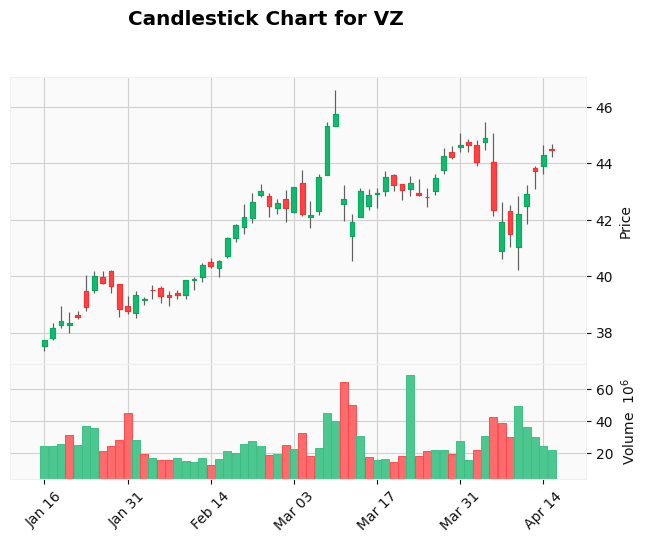

[*********************100%***********************]  1 of 1 completed

Plotting candlestick chart for VZ...
Prediction for VZ: Buy


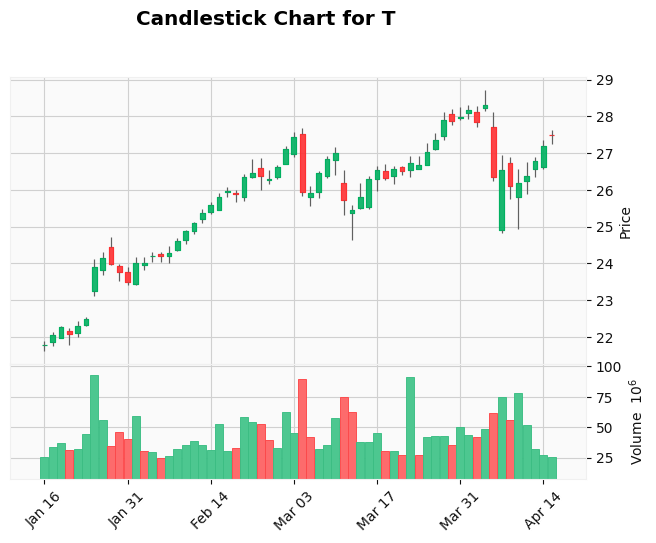

Plotting candlestick chart for T...
Prediction for T: Buy


In [ ]:
import mplfinance as mpf

def plot_candlestick_chart(ticker, data):
    # Ensure the data has the required columns and is properly indexed
    data = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
    data.columns = data.columns.droplevel(1) if isinstance(data.columns, pd.MultiIndex) else data.columns
    data = data.astype(float, errors='ignore')  # Convert columns to float if possible
    data.index.name = 'Date'  # Set the index name to 'Date' for mplfinance compatibility

    # Plot the candlestick chart
    mpf.plot(data, type='candle', volume=True, title=f'Candlestick Chart for {ticker}', style='yahoo')

# Plotting the candlestick chart for each ticker
for ticker in tickers:
    data = yf.download(ticker, period='3mo', interval='4h')
    if not data.empty:
        plot_candlestick_chart(ticker, data)
        print(f"Plotting candlestick chart for {ticker}...")
        # Print the prediction from the results
        prediction = df_results[df_results['Ticker'] == ticker]['Prediction'].values[0]
        print(f"Prediction for {ticker}: {prediction}")
    else:
        print(f"No data available for {ticker} for plotting.")


In [55]:
import requests
from bs4 import BeautifulSoup
import datetime

# Function to fetch news headlines from Google News
def fetch_google_news_headlines(nasdaq_tickers):
    headlines = []
    query = " OR ".join(nasdaq_tickers)  # Search for NASDAQ tickers
    url = f"https://news.google.com/rss/search?q={query}"
    today_date = datetime.datetime.now().date()
    
    try:
        response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
        response.raise_for_status()
        soup = BeautifulSoup(response.content, "xml")
        items = soup.find_all("item")
        
        for item in items:
            headline = item.title.text if item.title else ''
            link = item.link.text if item.link else ''
            pub_date = item.pubDate.text if item.pubDate else ''

            # Parse pub_date correctly
            pub_date_parsed = None
            if pub_date:
                try:
                    pub_date_parsed = datetime.datetime.strptime(pub_date, "%a, %d %b %Y %H:%M:%S %Z")
                except ValueError:
                    pub_date_parsed = None

            # Ensure headline is a string and not empty
            if isinstance(headline, str) and headline and pub_date_parsed:
                if (
                    any(ticker in headline for ticker in nasdaq_tickers) 
                    and pub_date_parsed.date() == today_date
                ):
                    headlines.append({"headline": headline, "link": link, "pub_date": pub_date_parsed})
        
        # Sort headlines by publication date (most recent first)
        headlines.sort(key=lambda x: x["pub_date"], reverse=True)
    except requests.RequestException as e:
        print(f"Error fetching news: {e}")

    return headlines

In [56]:
# Print the headlines for each ticker
for ticker in tickers:
    headlines = fetch_google_news_headlines([ticker])
    if headlines:
        print(f"Headlines for {ticker}:")
        for headline in headlines:
            print(f"- {headline['headline']} (Link: {headline['link']})")
    else:
        print(f"No headlines found for {ticker}.")

Headlines for VZ:
- Guggenheim Capital LLC Sells 113,754 Shares of Verizon Communications Inc. (NYSE:VZ) - MarketBeat (Link: https://news.google.com/rss/articles/CBMizgFBVV95cUxOVkpRMjBIZDIyVkljV3ZtV1lhSWIzYk03U1lSNi1nazRtZi0zMkxFY1FwanBWcFdfZDJIUU0wUFRxRTFvVDFaQzh3S2tnQnNfZG5KUnFLc2FUZVVVU0NzMFNtN1ZyWUlyQ0VZYkNXaC1nSmJrRkZmWV96VmpTbTdtcUJjYU1INWNTRzA4cnhmMURReDRSSDdiRXJ4N3puT211Z1RNdjFUVmFOYm9teHoxUkcxWVlzT0pFWGhiUkxNTmR6bTRpUU15YTdtZTRtZw?oc=5)
- Verizon Communications Inc. (NYSE:VZ) Shares Sold by Philadelphia Trust Co. - MarketBeat (Link: https://news.google.com/rss/articles/CBMiywFBVV95cUxPa0ZjMldzQUFQS3BhSDZWQXVwS0VzLUpLakFSWGtLVklHanppSlhUNW8zT2ZoMkJLYXdiSW9zRzlRY05JeUhubkRHbUdabVprQ0VadWRnaVpDdTBidFJlWkFaeWZSMGE1SXM5MGYxZVg5bFlnWjA1WXNkNG45N1Z6dDM2TC1odEx4OTNqQXNFMVRFUHR4eE54UGt4cXQ4ZHF4X1M4MlRYeEFqVkh1SlhHQlU5aEFZS0tRb0duYlBqV054Qi1EdTRDVnVZMA?oc=5)
- Verizon Communications Inc. (NYSE:VZ) Shares Sold by Rockefeller Capital Management L.P. - MarketBeat (Link: https://news.googl

In [57]:
# Print the count of headlines for each ticker
for ticker in tickers:
    headlines = fetch_google_news_headlines([ticker])
    print(f"Number of headlines for {ticker}: {len(headlines)}")

Number of headlines for VZ: 6
Number of headlines for T: 11


In [58]:
# Save and convert the headlines data to a JSON format and save it in a variable
import json
headlines_data = {}
for ticker in tickers:
    headlines = fetch_google_news_headlines([ticker])
    headlines_data[ticker] = headlines
    # Convert to JSON format
    headlines_json = json.dumps(headlines, default=str)  # Convert to JSON string
    # Print the JSON string
    print(f"JSON data for {ticker}: {headlines_json}")


JSON data for VZ: [{"headline": "Guggenheim Capital LLC Sells 113,754 Shares of Verizon Communications Inc. (NYSE:VZ) - MarketBeat", "link": "https://news.google.com/rss/articles/CBMizgFBVV95cUxOVkpRMjBIZDIyVkljV3ZtV1lhSWIzYk03U1lSNi1nazRtZi0zMkxFY1FwanBWcFdfZDJIUU0wUFRxRTFvVDFaQzh3S2tnQnNfZG5KUnFLc2FUZVVVU0NzMFNtN1ZyWUlyQ0VZYkNXaC1nSmJrRkZmWV96VmpTbTdtcUJjYU1INWNTRzA4cnhmMURReDRSSDdiRXJ4N3puT211Z1RNdjFUVmFOYm9teHoxUkcxWVlzT0pFWGhiUkxNTmR6bTRpUU15YTdtZTRtZw?oc=5", "pub_date": "2025-04-16 11:14:01"}, {"headline": "Verizon Communications Inc. (NYSE:VZ) Shares Sold by Philadelphia Trust Co. - MarketBeat", "link": "https://news.google.com/rss/articles/CBMiywFBVV95cUxPa0ZjMldzQUFQS3BhSDZWQXVwS0VzLUpLakFSWGtLVklHanppSlhUNW8zT2ZoMkJLYXdiSW9zRzlRY05JeUhubkRHbUdabVprQ0VadWRnaVpDdTBidFJlWkFaeWZSMGE1SXM5MGYxZVg5bFlnWjA1WXNkNG45N1Z6dDM2TC1odEx4OTNqQXNFMVRFUHR4eE54UGt4cXQ4ZHF4X1M4MlRYeEFqVkh1SlhHQlU5aEFZS0tRb0duYlBqV054Qi1EdTRDVnVZMA?oc=5", "pub_date": "2025-04-16 03:15:15"}, {"headline": "Verizon 

In [59]:
# Function to perform sentiment analysis using Google GenAI API based on the headlines JSON
# Note: Use the appropriate model and parameters for your use case and use Zero Shot prompting
def analyze_sentiment(headlines_json):
	prompt = f"Analyze the sentiment of the following headlines:\n{headlines_json}"
	try:
		response = client.models.generate_content(	
            model="gemini-2.0-flash",
            contents=prompt
		)
		sentiment_analysis = response.text
		return sentiment_analysis
	except Exception as e:
		print(f"Error during sentiment analysis: {e}")
		return None

# Perform sentiment analysis for each ticker's headlines
for ticker in tickers:
	headlines = fetch_google_news_headlines([ticker])
	if headlines:
		# Convert to JSON format
		headlines_json = json.dumps(headlines, default=str)
		# Perform sentiment analysis
		sentiment_analysis_zero_shot = analyze_sentiment(headlines_json)
		print(f"Sentiment analysis for {ticker}: {sentiment_analysis}")
	else:
		print(f"No headlines found for {ticker}.")

Sentiment analysis for VZ: Okay, I'll analyze the sentiment of the headlines and earnings report using the chain-of-thoughts approach you've described.

**Headlines Analysis:**

Here's a breakdown of each headline:

1.  **Headline:** "‘De-extinction’ of dire wolves promotes false hope: technology can’t undo extinction - The Conversation"
    *   Step 1: De-extinction efforts may be overhyped, technology limitations.
    *   Step 2: Negative
    *   Step 3: Promotes the idea that resources may be misdirected towards impractical goals.
    *   **Sentiment:** Negative
    *   **Reason:** Raises concerns about the feasibility and implications of de-extinction, potentially misallocating resources.

2.  **Headline:** "Walz won’t back down from ‘back to the office’ order - 5 EYEWITNESS NEWS"
    *   Step 1: Governor stands firm on requiring return to office.
    *   Step 2: Neutral
    *   Step 3: This is policy news that will likely affect certain businesses and industries.
    *   **Sentime

In [60]:
# Function to perform sentiment analysis using Google GenAI API based on the headlines JSON
# Note: Use the appropriate model and parameters for your use case and use Few Shot prompting
# Connect to Google drive and take the reference of the earnings report files in the drive, parse them and then combine the analysis with the headlines JSON
def analyze_sentiment_few_shot(headlines_json, earnings_report):
    prompt = f"""
    You are a financial analyst. Analyze the sentiment of the following headlines and earnings report. 
    Provide a detailed sentiment analysis for each headline and the earnings report, and summarize the overall sentiment.

    Headlines:
    {headlines_json}

    Earnings Report:
    {earnings_report}

    Example Analysis:
    Headline: "Company X reports record profits in Q3"
    Sentiment: Positive
    Reason: The headline indicates strong financial performance.

    Headline: "Company Y faces regulatory challenges"
    Sentiment: Negative
    Reason: The headline suggests potential legal or operational issues.

    Perform a similar analysis for the provided data.
    """
    try:
        response = client.models.generate_content(	
            model="gemini-2.0-flash",
            contents=prompt
        )
        sentiment_analysis = response.text
        return sentiment_analysis
    except Exception as e:
        print(f"Error during sentiment analysis: {e}")
        return None
earnings_report = "https://drive.google.com/drive/folders/1HBbahH8DOa6g6W1J31RUrupWf0qkhOTq"
# Perform sentiment analysis for each ticker's headlines with the earnings report
for ticker in tickers:
    headlines = fetch_google_news_headlines([ticker])
    if headlines:
        # Convert to JSON format
        headlines_json = json.dumps(headlines, default=str)
        # Perform sentiment analysis with the earnings report
        sentiment_analysis_few_shot = analyze_sentiment_few_shot(headlines_json, earnings_report)
        print(f"Sentiment analysis for {ticker} with earnings report: {sentiment_analysis}")
    else:
        print(f"No headlines found for {ticker}.")

Sentiment analysis for VZ with earnings report: Okay, I'll analyze the sentiment of the headlines and earnings report using the chain-of-thoughts approach you've described.

**Headlines Analysis:**

Here's a breakdown of each headline:

1.  **Headline:** "‘De-extinction’ of dire wolves promotes false hope: technology can’t undo extinction - The Conversation"
    *   Step 1: De-extinction efforts may be overhyped, technology limitations.
    *   Step 2: Negative
    *   Step 3: Promotes the idea that resources may be misdirected towards impractical goals.
    *   **Sentiment:** Negative
    *   **Reason:** Raises concerns about the feasibility and implications of de-extinction, potentially misallocating resources.

2.  **Headline:** "Walz won’t back down from ‘back to the office’ order - 5 EYEWITNESS NEWS"
    *   Step 1: Governor stands firm on requiring return to office.
    *   Step 2: Neutral
    *   Step 3: This is policy news that will likely affect certain businesses and industri

In [61]:
# Function to perform sentiment analysis using Google GenAI API based on the headlines JSON
# Note: Use the appropriate model and parameters for your use case and use Chain of Thoughts prompting
# Connect to Google drive and take the reference of the earnings report files in the drive, parse them and then combine the analysis with the headlines JSON
def analyze_sentiment_chain_of_thoughts(headlines_json, earnings_report):
    prompt = f"""
    You are a financial analyst. Analyze the sentiment of the following headlines and earnings report using a chain-of-thoughts approach. 
    Break down your reasoning step-by-step for each headline and the earnings report, and summarize the overall sentiment.

    Headlines:
    {headlines_json}

    Earnings Report:
    {earnings_report}

    Example Analysis:
    Headline: "Company X reports record profits in Q3"
    Step 1: Identify the key message in the headline. 
    Step 2: Determine whether the message is positive, negative, or neutral.
    Step 3: Provide a reason for the sentiment classification.
    Sentiment: Positive
    Reason: The headline indicates strong financial performance.

    Headline: "Company Y faces regulatory challenges"
    Step 1: Identify the key message in the headline. 
    Step 2: Determine whether the message is positive, negative, or neutral.
    Step 3: Provide a reason for the sentiment classification.
    Sentiment: Negative
    Reason: The headline suggests potential legal or operational issues.

    Perform a similar step-by-step analysis for the provided data.
    """
    try:
        response = client.models.generate_content(
            model="gemini-2.0-flash",
            contents=prompt
        )
        sentiment_analysis = response.text
        return sentiment_analysis
    except Exception as e:
        print(f"Error during sentiment analysis: {e}")
        return None

earnings_report = "https://drive.google.com/drive/folders/1HBbahH8DOa6g6W1J31RUrupWf0qkhOTq"
# Perform sentiment analysis for each ticker's headlines with the earnings report
for ticker in tickers:
    headlines = fetch_google_news_headlines([ticker])
    if headlines:
        # Convert to JSON format
        headlines_json = json.dumps(headlines, default=str)
        # Perform sentiment analysis with the earnings report
        sentiment_analysis_COT = analyze_sentiment_chain_of_thoughts(headlines_json, earnings_report)
        print(f"Sentiment analysis for {ticker} with earnings report: {sentiment_analysis}")
    else:
        print(f"No headlines found for {ticker}.")

Sentiment analysis for VZ with earnings report: Okay, I'll analyze the sentiment of the headlines and earnings report using the chain-of-thoughts approach you've described.

**Headlines Analysis:**

Here's a breakdown of each headline:

1.  **Headline:** "‘De-extinction’ of dire wolves promotes false hope: technology can’t undo extinction - The Conversation"
    *   Step 1: De-extinction efforts may be overhyped, technology limitations.
    *   Step 2: Negative
    *   Step 3: Promotes the idea that resources may be misdirected towards impractical goals.
    *   **Sentiment:** Negative
    *   **Reason:** Raises concerns about the feasibility and implications of de-extinction, potentially misallocating resources.

2.  **Headline:** "Walz won’t back down from ‘back to the office’ order - 5 EYEWITNESS NEWS"
    *   Step 1: Governor stands firm on requiring return to office.
    *   Step 2: Neutral
    *   Step 3: This is policy news that will likely affect certain businesses and industri

In [62]:
# Analyze the all list of sentiment results and calculate an overall sentiment score for the stock based on the sentiment of the headlines using GenAI Gemini API
# Note: sentiment_analysis_zero_shot, sentiment_analysis_few_shot, and sentiment_analysis_chain_of_thoughts are the results from the previous analysis
def analyze_overall_sentiment(sentiment_analysis_zero_shot, sentiment_analysis_few_shot, sentiment_analysis_chain_of_thoughts):
    prompt = f"""
    You are a financial analyst. Analyze the overall sentiment of the following sentiment analyses and provide a final sentiment score for the stock.

    Sentiment Analysis Zero Shot:
    {sentiment_analysis_zero_shot}

    Sentiment Analysis Few Shot:
    {sentiment_analysis_few_shot}

    Sentiment Analysis Chain of Thoughts:
    {sentiment_analysis_chain_of_thoughts}

    Provide a final sentiment score for the stock based on the analysis.
    """
    try:
        response = client.models.generate_content(
            model="gemini-2.0-flash",
            contents=prompt
        )
        overall_sentiment = response.text
        return overall_sentiment
    except Exception as e:
        print(f"Error during overall sentiment analysis: {e}")
        return None

# Perform overall sentiment analysis for each ticker
for ticker in tickers:
    headlines = fetch_google_news_headlines([ticker])
    if headlines:
        # Convert to JSON format
        headlines_json = json.dumps(headlines, default=str)
        # Perform sentiment analysis with the earnings report
        sentiment_analysis_zero_shot = analyze_sentiment(headlines_json)
        sentiment_analysis_few_shot = analyze_sentiment_few_shot(headlines_json, earnings_report)
        sentiment_analysis_chain_of_thoughts = analyze_sentiment_chain_of_thoughts(headlines_json, earnings_report)

        # Analyze overall sentiment
        overall_sentiment = analyze_overall_sentiment(sentiment_analysis_zero_shot, sentiment_analysis_few_shot, sentiment_analysis_chain_of_thoughts)
        print(f"Overall sentiment for {ticker}: {overall_sentiment}")
    else:
        print(f"No headlines found for {ticker}.")

Overall sentiment for VZ: Okay, taking into account all three sentiment analyses, here's a final sentiment score and justification:

**Final Sentiment Score: Slightly Positive (0.3)**

**Justification:**

While all analyses acknowledge a mixed picture, the *earnings report analysis consistently leans towards positive*, and this carries more weight. Here's a breakdown of why:

*   **Earnings Report Importance:** The earnings report provides concrete financial data and management's outlook. It's a direct reflection of the company's performance, which is far more informative than just "buy/sell" headlines.
*   **Headline Nuance:** The headlines are mixed. While the "sell" headlines raise concern, it's crucial to remember:
    *   **Rebalancing:** Institutional investors sell for a multitude of reasons beyond a negative outlook on the specific stock (e.g., rebalancing portfolios to meet asset allocation targets, raising cash to meet investor redemptions).
    *   **Volume:** The analyses d

In [63]:
def make_final_call(tickers, overall_sentiment):
    for ticker in tickers:
        if "Positive" in overall_sentiment:
            final_call = "Buy"
        elif "Neutral" in overall_sentiment:
            final_call = "Hold"
        else:  # Negative sentiment
            final_call = "Sell"
        print(f"Final Call for {ticker}: {final_call}")

# Example usage
make_final_call(tickers, overall_sentiment)


Final Call for VZ: Buy
Final Call for T: Buy


In [64]:
#perform sentiment analysis on the headlines and earnings report using the NLTK library on overall sentiment
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Function to perform sentiment analysis using NLTK VADER
def nltk_sentiment_analysis(headlines_json):
    sia = SentimentIntensityAnalyzer()
    headlines = json.loads(headlines_json)
    sentiment_scores = []
    
    for headline in headlines:
        text = headline['headline']
        tokens = word_tokenize(text.lower())
        filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
        sentiment_score = sia.polarity_scores(" ".join(filtered_tokens))
        sentiment_scores.append(sentiment_score)
    
    return sentiment_scores

# Perform NLTK sentiment analysis for each ticker's headlines
for ticker in tickers:
    headlines = fetch_google_news_headlines([ticker])
    if headlines:
        # Convert to JSON format
        headlines_json = json.dumps(headlines, default=str)
        # Perform NLTK sentiment analysis
        sentiment_scores = nltk_sentiment_analysis(headlines_json)
        print(f"NLTK Sentiment analysis for {ticker}: {sentiment_scores}")
    else:
        print(f"No headlines found for {ticker}.")
# Function to perform sentiment analysis using NLTK VADER on the overall sentiment
def nltk_sentiment_analysis_overall(sentiment_analysis):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(sentiment_analysis)
    return sentiment_score

# Perform NLTK sentiment analysis on the overall sentiment for each ticker
for ticker in tickers:
    headlines = fetch_google_news_headlines([ticker])
    if headlines:
        # Convert to JSON format
        headlines_json = json.dumps(headlines, default=str)
        # Perform NLTK sentiment analysis on the overall sentiment
        sentiment_scores = nltk_sentiment_analysis_overall(overall_sentiment)
        print(f"NLTK Sentiment analysis on overall sentiment for {ticker}: {sentiment_scores}")
    else:
        print(f"No headlines found for {ticker}.")

# Function to perform sentiment analysis using NLTK VADER on the overall sentiment and make a final call
def nltk_sentiment_analysis_final_call(sentiment_analysis):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(sentiment_analysis)
    if sentiment_score['compound'] >= 0.05:
        final_call = "Buy"
    elif sentiment_score['compound'] <= -0.05:
        final_call = "Sell"
    else:
        final_call = "Hold"
    return final_call

# Perform NLTK sentiment analysis on the overall sentiment for each ticker and make a final call
for ticker in tickers:
    headlines = fetch_google_news_headlines([ticker])
    if headlines:
        # Convert to JSON format
        headlines_json = json.dumps(headlines, default=str)
        # Perform NLTK sentiment analysis on the overall sentiment and make a final call
        final_call = nltk_sentiment_analysis_final_call(overall_sentiment)
        print(f"Final Call for {ticker} based on NLTK sentiment analysis: {final_call}")
    else:
        print(f"No headlines found for {ticker}.")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yashu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\yashu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NLTK Sentiment analysis for VZ: [{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.296}, {'neg': 0.0, 'neu': 0.56, 'pos': 0.44, 'compound': 0.6705}, {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.296}, {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.4939}, {'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'compound': 0.6705}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]
NLTK Sentiment analysis for T: [{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.128}, {'neg': 0.509, 'neu': 0.491, 'pos': 0.0, 'compound': -0.8074}, {'neg': 0.313, 'neu': 0.687, 'pos': 0.0, 'compound': -0.6249}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.517, 'neu': 0.483, 'pos': 0.0, 'compound': -0.7579}, {'neg': 0.126, 'neu': 0.505, 'pos': 0.369, 'compound': 0.7003}, {'neg': 0.134, 'neu': 0.866, 'pos': 0.0, 'compound': -0.1779}, {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.3612}, {'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}, {'neg': 0.383, 'neu':